The point of this notebook: building of an emulator with actual data.
Plan: no LHC just yet, no massive neutrinos, just redshift 0. We'll vary only spectral index. Each power spectrum will have
a k-length of 8. We will use a total of 20 samples.

In [1]:
import numpy as np
import pylab as pb
import GPy

pb.ion()

In [5]:
X = np.linspace(0.84, 1.1, 20)[:,None]
Y = np.load("primitive_spectra.npy")

In [6]:
Y.shape

(20, 8)

In [7]:
k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(X,Y,k)

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f7824ed5220>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f7824f06340>,
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f7824a60640>,
  <matplotlib.collections.PolyCollection at 0x7f7824a78e20>]}

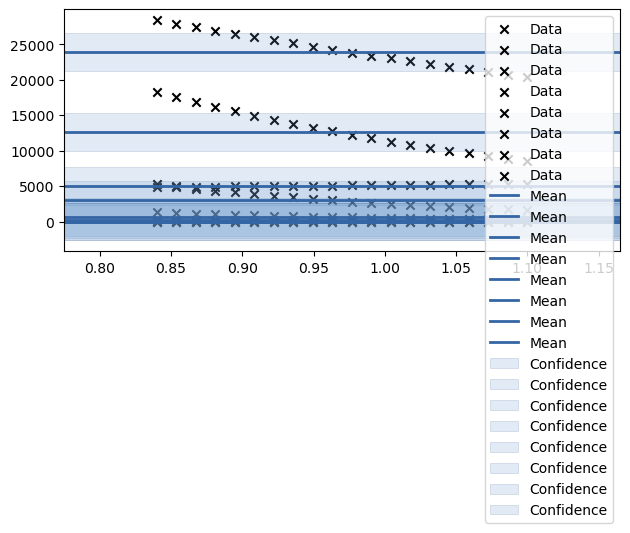

In [8]:
m.constrain_positive('') # '' is a regex matching all parameter names
m.optimize()
m.plot()

In [9]:
x = np.array([np.array([0.4])])
x

array([[0.4]])

In [19]:
guess, uncertainties = m.predict(x)
guess

array([[6.65890568e+02, 3.07522653e+03, 1.26499723e+04, 2.38937905e+04,
        5.03756204e+03, 2.65291882e+02, 5.90985619e+00, 9.08030079e-02]])

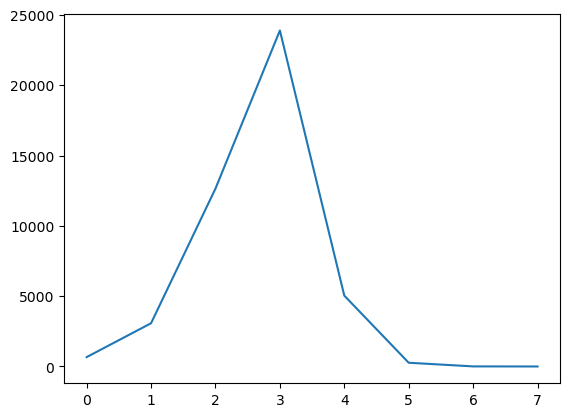

In [20]:
#import matplotlib.pyplot as plt
pb.plot(guess[0])

In [23]:
X

array([[0.05],
       [0.15],
       [0.25],
       [0.35],
       [0.45],
       [0.55],
       [0.65],
       [0.75],
       [0.85],
       [0.95]])

In [28]:
m.predict(X)

(array([[-0.44461535],
        [ 0.01773381],
        [-0.72250031],
        [-1.41297431],
        [-0.77280558],
        [ 0.70717991],
        [ 1.50425714],
        [ 0.70917967],
        [ 0.0192352 ],
        [ 0.36268245]]),
 array([[3.40944510e-08],
        [3.40944364e-08],
        [3.40944144e-08],
        [3.40943949e-08],
        [3.40943840e-08],
        [3.40943840e-08],
        [3.40943949e-08],
        [3.40944142e-08],
        [3.40944362e-08],
        [3.40944504e-08]]))